##Name : Sanyuja Kadam
###Title : MovieBuff - We recommend better

####Sub-Title : Confused on what to watch today? Leave that on the MovieBuff.

1) Objective of the Project

We all face this challenging task on choosing what to watch when it comes to movies or tv series. We can have numerous discussions on these but we end up watching those same movies that we have been watching over these years. Now that our cohor wants to host a movie night its time we devise a recommendation system.

Our Data Science program wants students to interact and get to know each other so they are hosting a movie night and have asked the students to vote on different parameters such as their likeness to different Genres. Based on this, our team will decide on what movie to be hosted on Movie Night.

I have decided to make everyone's life easier by devising a recommendation system where you put the students likeness and decide on what type of Genre is most liked by the student, so we can host a movie of that type.

Now lets say we have a new student who joined up late where do we classify him/her. Here is where MovieBuff comes in action. MovieBuff will help everyone understand what a student likes, their favourite genre and if there is a point to choose a movie what could the student choose.

Lets import all the libraries neede for our code

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

2) Data Exploration

The below dataset is generated from www.socrative.com where all of our stuents have voted on different parameters and this is how we have created the dataset

2.1)Understanding the dataset

In [2]:
data = pd.read_csv("Class_2022_10_15__22_05_QZ_Movies Movies & Movies.csv")

In [3]:
df = pd.DataFrame(data)

The dataset consists of 38 observations and 17 features which has voting of different likeness to genres and thier preffered movie

In [4]:
data.shape

(38, 17)

Let's check the sample of our dataset

In [5]:
df.head(4)

,Student Name,"Using a scale 1 to 10, how much do you like action movies? (use decimals, e.g. 4.2)","Using a scale 1 to 10, how much do you like adventure movies? (use decimals, e.g. 4.2)","Using a scale 1 to 10, how much do you like comedy movies? (use decimals, e.g. 4.2)","Using a scale 1 to 10, how much do you like crime movies? (use decimals, e.g. 4.2)","Using a scale 1 to 10, how much do you like drama movies?","Using a scale 1 to 10, how much do you like fantasy movies?","Using a scale 1 to 10, how much do you like science fiction movies?","Using a scale 1 to 10, how much do you like horror movies?","Using a scale 1 to 10, how much do you like mystery movies?","Using a scale 1 to 10, how much do you like romance movies?","Using a scale 1 to 10, how much do you like thriller movies?","Using a scale 1 to 10, how much do you like documentary movies?","Using a scale 1 to 10, how much do you like animated movies?","On average, how many movies you watch on a single week",Which of the following movies you'd say is your preferred?,Describe yourself with 5 adjectives. For example:- Capable- Friendly- Happy- Sociable- Slow
0,Akbar,9.9,9.9,9.8,8.5,5.4,7.9,8.9,9.9,6.9,10.0,9.5,3.8,7.4,D. 4) Three to four movies a week,D. Spiderman,Sociable\nFriendly\nchatty\nloyal\nHappy
1,Ali,6.0,6.0,6.0,5.0,7.0,3.0,10.0,3.0,7.0,4.0,5.0,9.0,7.0,B. 2) One movie a week,A. Star Wars\nE. Mulan,"Motivated, Reliable, Intuitive, Independent, A..."
2,Anh T,8.9,7.5,5.1,9.4,6.6,7.2,5.5,4.6,7.7,6.4,9.5,2.2,4.8,D. 4) Three to four movies a week,D. Spiderman,- Quiet\n- Introverted\n- Happy\n- Slow\n- Funny
3,Brandon Inoshita,8.9,9.1,5.6,6.1,1.2,9.3,9.0,6.2,6.3,5.2,8.3,7.2,9.7,C. 3) Two movies a week,A. Star Wars,-Slow\n-Anxious\n-Awkward\n-Happy\n-Diligent


2.2) Cleaning the data:

2.2.1) Changing column names

We have very larger column names so I have reduced their name so as to make th coding easier

In [6]:
df = df.rename(columns={"Using a scale 1 to 10, how much do you like comedy movies? (use decimals, e.g. 4.2)": "Comedy", "Using a scale 1 to 10, how much do you like crime movies? (use decimals, e.g. 4.2)": "Crime", "Using a scale 1 to 10, how much do you like drama movies?":"Drama", "Using a scale 1 to 10, how much do you like fantasy movies?":"Fantasy", "Using a scale 1 to 10, how much do you like science fiction movies?" : "Science Fiction", "Using a scale 1 to 10, how much do you like action movies? (use decimals, e.g. 4.2)": "Action", "Using a scale 1 to 10, how much do you like adventure movies? (use decimals, e.g. 4.2)": "Adventure", "Using a scale 1 to 10, how much do you like horror movies?" : "Horror", "Using a scale 1 to 10, how much do you like mystery movies?": "Mystery", "Using a scale 1 to 10, how much do you like romance movies?": "Romance", "Using a scale 1 to 10, how much do you like thriller movies?": "Thriller", "Using a scale 1 to 10, how much do you like documentary movies?": "Documentary", "Using a scale 1 to 10, how much do you like animated movies?": "Animated", "On average, how many movies you watch on a single week": "Average in a Week", "Which of the following movies you'd say is your preferred?":"Preference","Describe yourself with 5 adjectives. For example:- Capable- Friendly- Happy- Sociable- Slow": "Describe Yourself"})

In [7]:
test = df.copy()

In [8]:
test.head(3)

,Student Name,Action,Adventure,Comedy,Crime,Drama,Fantasy,Science Fiction,Horror,Mystery,Romance,Thriller,Documentary,Animated,Average in a Week,Preference,Describe Yourself
0,Akbar,9.9,9.9,9.8,8.5,5.4,7.9,8.9,9.9,6.9,10.0,9.5,3.8,7.4,D. 4) Three to four movies a week,D. Spiderman,Sociable\nFriendly\nchatty\nloyal\nHappy
1,Ali,6.0,6.0,6.0,5.0,7.0,3.0,10.0,3.0,7.0,4.0,5.0,9.0,7.0,B. 2) One movie a week,A. Star Wars\nE. Mulan,"Motivated, Reliable, Intuitive, Independent, A..."
2,Anh T,8.9,7.5,5.1,9.4,6.6,7.2,5.5,4.6,7.7,6.4,9.5,2.2,4.8,D. 4) Three to four movies a week,D. Spiderman,- Quiet\n- Introverted\n- Happy\n- Slow\n- Funny


2.2.2) Changing Categorical Data to Numerical Data so that we can apply clustering on **it**

I am applying encoding techniques so that the dataset can be used more efficiently for K-Means clustering

In [9]:
le = LabelEncoder()

In [10]:
test["Average in a Week"] = le.fit_transform(test["Average in a Week"])

In [11]:
test.head(4)

,Student Name,Action,Adventure,Comedy,Crime,Drama,Fantasy,Science Fiction,Horror,Mystery,Romance,Thriller,Documentary,Animated,Average in a Week,Preference,Describe Yourself
0,Akbar,9.9,9.9,9.8,8.5,5.4,7.9,8.9,9.9,6.9,10.0,9.5,3.8,7.4,3,D. Spiderman,Sociable\nFriendly\nchatty\nloyal\nHappy
1,Ali,6.0,6.0,6.0,5.0,7.0,3.0,10.0,3.0,7.0,4.0,5.0,9.0,7.0,1,A. Star Wars\nE. Mulan,"Motivated, Reliable, Intuitive, Independent, A..."
2,Anh T,8.9,7.5,5.1,9.4,6.6,7.2,5.5,4.6,7.7,6.4,9.5,2.2,4.8,3,D. Spiderman,- Quiet\n- Introverted\n- Happy\n- Slow\n- Funny
3,Brandon Inoshita,8.9,9.1,5.6,6.1,1.2,9.3,9.0,6.2,6.3,5.2,8.3,7.2,9.7,2,A. Star Wars,-Slow\n-Anxious\n-Awkward\n-Happy\n-Diligent


In [97]:
data['On average, how many movies you watch on a single week'].value_counts()

B. 2) One movie a week                     18
C. 3) Two movies a week                     6
A. 1) zero movies. I don't watch movies     5
E. 5) More than 4 movies a week             4
D. 4) Three to four movies a week           3
D. 4) Three to four movies a week\n         1
Name: On average, how many movies you watch on a single week, dtype: int64

In [98]:
test['Average in a Week'].value_counts()

1    18
2     6
0     5
5     4
3     3
4     1
6     1
Name: Average in a Week, dtype: int64

The above code assigns a nuerical value to the chosen option. Like for One movie a week it has assigned the value "1" as well as for others too.

2.2.3) Splitting the prefrence column and then converting to numerical data

The column preference has many different movie options so we need to consider each and every prefrence of the student and then convert he categorical data to numerical data using Label Encoding

In [12]:
new = test["Preference"].str.split("\n", n = 3, expand = True)
test["Preference 1"]= new[0]
test["Preference 2"]= new[1]
test["Preference 3"]= new[2]
test["Preference 4"]= new[3]

In [13]:
test.tail(4)

,Student Name,Action,Adventure,Comedy,Crime,Drama,Fantasy,Science Fiction,Horror,Mystery,...,Thriller,Documentary,Animated,Average in a Week,Preference,Describe Yourself,Preference 1,Preference 2,Preference 3,Preference 4
34,anusha reddy,5.5,6.0,8.5,9.9,9.0,10.0,8.5,10.0,9.5,...,9.1,5.1,7.5,1,D. Spiderman\nG. Jurassic Park,Ambitious\nSociable\nNight Owl\nFriendly\nEasy...,D. Spiderman,G. Jurassic Park,None,None
35,eknath vamsi punna,10.0,10.0,7.0,10.0,1.0,1.0,10.0,5.0,10.0,...,10.0,0.1,0.2,5,D. Spiderman\nG. Jurassic Park,-Punctual\n-quick\n-aggressive\n-happy\n-self-...,D. Spiderman,G. Jurassic Park,None,None
36,sai,8.5,9.0,10.0,10.0,6.0,8.9,9.0,2.0,7.8,...,7.5,6.0,10.0,1,C. Gladiator,calm\ndedicated \nambivert\nreligious \nthankful,C. Gladiator,None,None,None
37,vrushabhkumar shrimali,10.0,10.0,10.0,9.0,6.0,8.0,6.0,9.0,10.0,...,6.0,3.0,10.0,1,B. Shrek\nD. Spiderman\nE. Mulan\nG. Jurassic ...,"Friendly,\nStrong,\nGood,\nSociable,\nCapable",B. Shrek,D. Spiderman,E. Mulan,G. Jurassic Park


In [14]:
test["Preference 1"] = le.fit_transform(test["Preference 1"])
test["Preference 2"] = le.fit_transform(test["Preference 2"])
test["Preference 3"] = le.fit_transform(test["Preference 3"])
test["Preference 4"] = le.fit_transform(test["Preference 4"])

In [15]:
test.tail(4)

,Student Name,Action,Adventure,Comedy,Crime,Drama,Fantasy,Science Fiction,Horror,Mystery,...,Thriller,Documentary,Animated,Average in a Week,Preference,Describe Yourself,Preference 1,Preference 2,Preference 3,Preference 4
34,anusha reddy,5.5,6.0,8.5,9.9,9.0,10.0,8.5,10.0,9.5,...,9.1,5.1,7.5,1,D. Spiderman\nG. Jurassic Park,Ambitious\nSociable\nNight Owl\nFriendly\nEasy...,3,3,3,1
35,eknath vamsi punna,10.0,10.0,7.0,10.0,1.0,1.0,10.0,5.0,10.0,...,10.0,0.1,0.2,5,D. Spiderman\nG. Jurassic Park,-Punctual\n-quick\n-aggressive\n-happy\n-self-...,3,3,3,1
36,sai,8.5,9.0,10.0,10.0,6.0,8.9,9.0,2.0,7.8,...,7.5,6.0,10.0,1,C. Gladiator,calm\ndedicated \nambivert\nreligious \nthankful,2,4,3,1
37,vrushabhkumar shrimali,10.0,10.0,10.0,9.0,6.0,8.0,6.0,9.0,10.0,...,6.0,3.0,10.0,1,B. Shrek\nD. Spiderman\nE. Mulan\nG. Jurassic ...,"Friendly,\nStrong,\nGood,\nSociable,\nCapable",1,1,1,0


In [16]:
use = test.copy()

In [17]:
use.drop("Preference", inplace=True, axis=1)

In [18]:
use.head(4)

,Student Name,Action,Adventure,Comedy,Crime,Drama,Fantasy,Science Fiction,Horror,Mystery,Romance,Thriller,Documentary,Animated,Average in a Week,Describe Yourself,Preference 1,Preference 2,Preference 3,Preference 4
0,Akbar,9.9,9.9,9.8,8.5,5.4,7.9,8.9,9.9,6.9,10.0,9.5,3.8,7.4,3,Sociable\nFriendly\nchatty\nloyal\nHappy,3,4,3,1
1,Ali,6.0,6.0,6.0,5.0,7.0,3.0,10.0,3.0,7.0,4.0,5.0,9.0,7.0,1,"Motivated, Reliable, Intuitive, Independent, A...",0,2,3,1
2,Anh T,8.9,7.5,5.1,9.4,6.6,7.2,5.5,4.6,7.7,6.4,9.5,2.2,4.8,3,- Quiet\n- Introverted\n- Happy\n- Slow\n- Funny,3,4,3,1
3,Brandon Inoshita,8.9,9.1,5.6,6.1,1.2,9.3,9.0,6.2,6.3,5.2,8.3,7.2,9.7,2,-Slow\n-Anxious\n-Awkward\n-Happy\n-Diligent,0,4,3,1


In [19]:
use.shape

(38, 20)

In [20]:
Describe = use["Describe Yourself"]
use = use.drop(columns=["Describe Yourself"])
use.insert(loc=19, column="Describe Yourself", value = Describe)

In [21]:
use.tail(4)

,Student Name,Action,Adventure,Comedy,Crime,Drama,Fantasy,Science Fiction,Horror,Mystery,Romance,Thriller,Documentary,Animated,Average in a Week,Preference 1,Preference 2,Preference 3,Preference 4,Describe Yourself
34,anusha reddy,5.5,6.0,8.5,9.9,9.0,10.0,8.5,10.0,9.5,8.5,9.1,5.1,7.5,1,3,3,3,1,Ambitious\nSociable\nNight Owl\nFriendly\nEasy...
35,eknath vamsi punna,10.0,10.0,7.0,10.0,1.0,1.0,10.0,5.0,10.0,0.1,10.0,0.1,0.2,5,3,3,3,1,-Punctual\n-quick\n-aggressive\n-happy\n-self-...
36,sai,8.5,9.0,10.0,10.0,6.0,8.9,9.0,2.0,7.8,8.0,7.5,6.0,10.0,1,2,4,3,1,calm\ndedicated \nambivert\nreligious \nthankful
37,vrushabhkumar shrimali,10.0,10.0,10.0,9.0,6.0,8.0,6.0,9.0,10.0,1.0,6.0,3.0,10.0,1,1,1,1,0,"Friendly,\nStrong,\nGood,\nSociable,\nCapable"


2.2.4) Using the copy dataset for our analysis.

In [22]:
final = use.copy()

In [23]:
final = final.drop(columns=["Describe Yourself"])

In [24]:
final.tail(4)

,Student Name,Action,Adventure,Comedy,Crime,Drama,Fantasy,Science Fiction,Horror,Mystery,Romance,Thriller,Documentary,Animated,Average in a Week,Preference 1,Preference 2,Preference 3,Preference 4
34,anusha reddy,5.5,6.0,8.5,9.9,9.0,10.0,8.5,10.0,9.5,8.5,9.1,5.1,7.5,1,3,3,3,1
35,eknath vamsi punna,10.0,10.0,7.0,10.0,1.0,1.0,10.0,5.0,10.0,0.1,10.0,0.1,0.2,5,3,3,3,1
36,sai,8.5,9.0,10.0,10.0,6.0,8.9,9.0,2.0,7.8,8.0,7.5,6.0,10.0,1,2,4,3,1
37,vrushabhkumar shrimali,10.0,10.0,10.0,9.0,6.0,8.0,6.0,9.0,10.0,1.0,6.0,3.0,10.0,1,1,1,1,0


Here we have dropped the column "Describe yourself" since it contains too much categorical data. And we have set our rown names to the names of the students from our cohort

In [25]:
final = final.set_index("Student Name")

In [26]:
final.tail(4)

,Action,Adventure,Comedy,Crime,Drama,Fantasy,Science Fiction,Horror,Mystery,Romance,Thriller,Documentary,Animated,Average in a Week,Preference 1,Preference 2,Preference 3,Preference 4
Student Name,,,,,,,,,,,,,,,,,,
anusha reddy,5.5,6.0,8.5,9.9,9.0,10.0,8.5,10.0,9.5,8.5,9.1,5.1,7.5,1,3,3,3,1
eknath vamsi punna,10.0,10.0,7.0,10.0,1.0,1.0,10.0,5.0,10.0,0.1,10.0,0.1,0.2,5,3,3,3,1
sai,8.5,9.0,10.0,10.0,6.0,8.9,9.0,2.0,7.8,8.0,7.5,6.0,10.0,1,2,4,3,1
vrushabhkumar shrimali,10.0,10.0,10.0,9.0,6.0,8.0,6.0,9.0,10.0,1.0,6.0,3.0,10.0,1,1,1,1,0


2.2.5) Checking for NA values and dropping them

In [27]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38 entries, Akbar to vrushabhkumar shrimali
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Action             38 non-null     float64
 1   Adventure          37 non-null     float64
 2   Comedy             37 non-null     float64
 3   Crime              37 non-null     float64
 4   Drama              37 non-null     float64
 5   Fantasy            37 non-null     float64
 6   Science Fiction    37 non-null     float64
 7   Horror             37 non-null     float64
 8   Mystery            37 non-null     float64
 9   Romance            37 non-null     float64
 10  Thriller           37 non-null     float64
 11  Documentary        37 non-null     float64
 12  Animated           37 non-null     float64
 13  Average in a Week  38 non-null     int64  
 14  Preference 1       38 non-null     int64  
 15  Preference 2       38 non-null     int64  
 16  Preferenc

In [28]:
final.isnull().sum().sum()

12

Here we can see that there are still 12 records which have a NA or null value lets drop them and use our cleaned dataset

In [29]:
final=final.dropna()

In [30]:
final.isnull().sum().sum()

0

As you can see now there are no null values and the dataset is ready to use.

2.3) Statistical Summary of the dataset

Let us understand the types of columns what sort of data do they store. From the below data we can see that all the columns contain Numeric data and for Action its minimum value is 4 and the maximum value is 10. All the columns have been divided into quartiles as well.

In [99]:
final.describe()

,Action,Adventure,Comedy,Crime,Drama,Fantasy,Science Fiction,Horror,Mystery,Romance,Thriller,Documentary,Animated,Average in a Week,Preference 1,Preference 2,Preference 3,Preference 4
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000
mean,8.407838,8.202432,8.408108,7.637838,6.021351,6.516216,8.225946,6.356486,8.010270,6.549189,8.061081,6.240811,6.918919,1.702703,2.108108,3.540541,2.837838,0.945946
std,1.574588,1.585997,1.556238,2.278444,2.953732,2.710219,1.632284,3.154089,1.499264,2.607675,1.847262,2.549011,2.928010,1.469408,1.744575,1.069647,0.601550,0.229243
min,4.000000,4.000000,4.200000,3.000000,1.000000,1.000000,4.500000,1.000000,4.500000,0.100000,3.400000,0.100000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.700000,7.000000,7.800000,6.100000,2.300000,5.500000,6.800000,4.200000,7.300000,5.000000,7.000000,4.100000,5.000000,1.000000,1.000000,4.000000,3.000000,1.000000
50%,8.500000,8.500000,8.900000,8.600000,7.000000,7.000000,8.900000,6.900000,8.000000,7.000000,8.500000,6.500000,7.500000,1.000000,2.000000,4.000000,3.000000,1.000000
75%,9.900000,9.500000,9.800000,9.300000,8.000000,8.500000,9.500000,9.800000,9.500000,8.500000,9.600000,8.600000,9.600000,2.000000,3.000000,4.000000,3.000000,1.000000
max,10.000000,10.000000,10.000000,10.100000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,5.000000,4.000000,3.000000,1.000000


2.4) Showing the first 10 rows of the dataset

In [100]:
final.head(10)

,Action,Adventure,Comedy,Crime,Drama,Fantasy,Science Fiction,Horror,Mystery,Romance,Thriller,Documentary,Animated,Average in a Week,Preference 1,Preference 2,Preference 3,Preference 4
Student Name,,,,,,,,,,,,,,,,,,
Akbar,9.9,9.9,9.8,8.5,5.4,7.9,8.9,9.9,6.9,10.0,9.5,3.8,7.4,3,3,4,3,1
Ali,6.0,6.0,6.0,5.0,7.0,3.0,10.0,3.0,7.0,4.0,5.0,9.0,7.0,1,0,2,3,1
Anh T,8.9,7.5,5.1,9.4,6.6,7.2,5.5,4.6,7.7,6.4,9.5,2.2,4.8,3,3,4,3,1
Brandon Inoshita,8.9,9.1,5.6,6.1,1.2,9.3,9.0,6.2,6.3,5.2,8.3,7.2,9.7,2,0,4,3,1
Changhao Dong,4.0,5.4,8.3,6.5,2.3,1.3,6.8,7.6,4.5,6.4,3.4,7.5,5.5,0,2,4,3,1
Clark Blatter,9.8,8.2,8.5,9.0,6.5,6.9,7.2,4.2,7.4,6.9,7.3,6.5,9.5,1,1,4,3,1
FRANCIS,6.0,8.0,10.0,8.0,5.0,4.0,10.0,10.0,8.0,7.0,6.0,9.0,10.0,0,1,4,3,1
HARSH,10.0,4.0,8.0,10.0,8.0,7.0,8.0,3.0,10.0,9.0,10.0,3.0,4.0,1,1,4,3,1
Haodong Ma,7.0,6.0,9.0,3.0,1.0,4.0,6.0,8.0,7.0,6.0,8.0,2.0,4.0,2,3,4,3,1


2.5) Let's check how many movies do students watch in a week

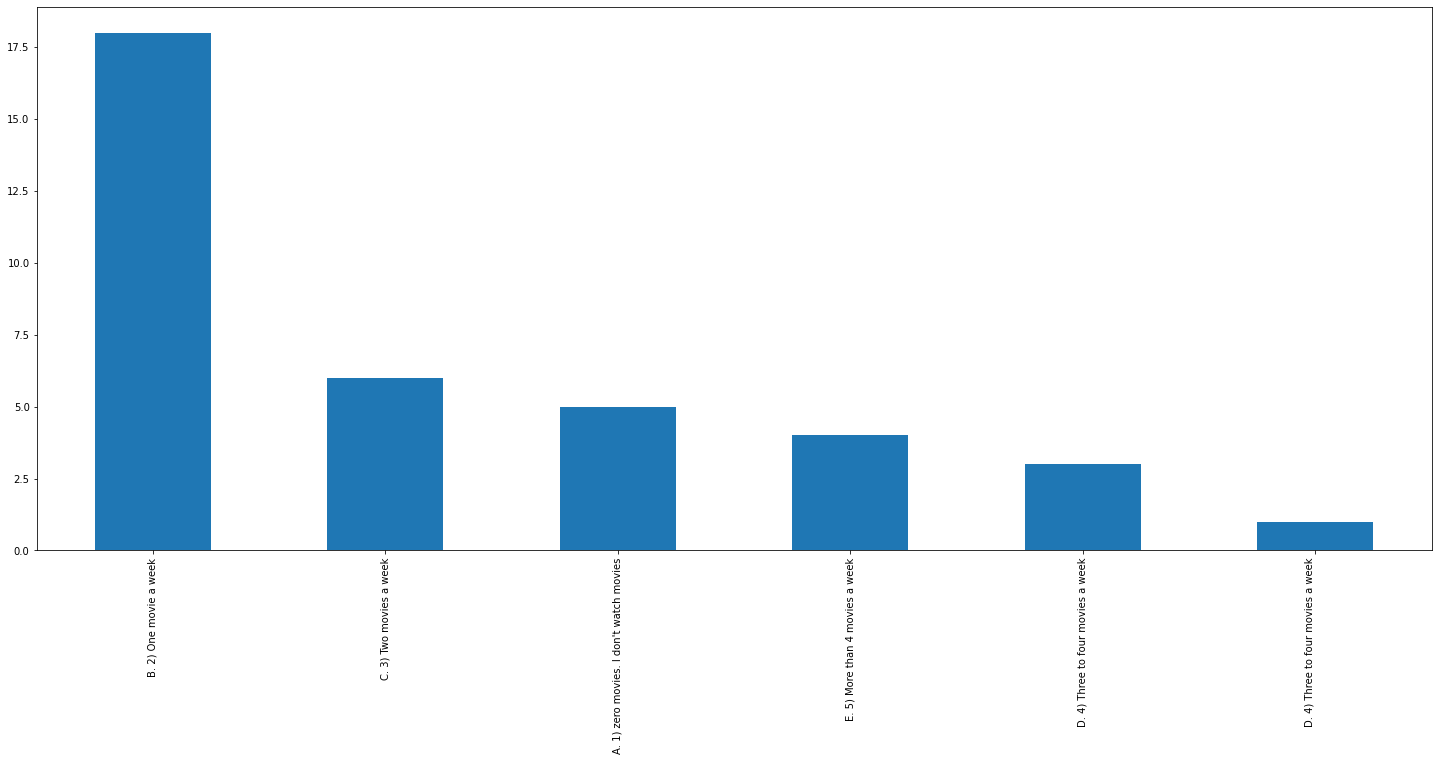

In [32]:
plt.figure(figsize=(25, 10))
data['On average, how many movies you watch on a single week'].value_counts().plot(kind='bar')

From the above visualization we can see that most students watch one movie a week. So we can safely say that the Data Science program does keep students engaged in the coursework

2.6)Let's check the preferred movie of students

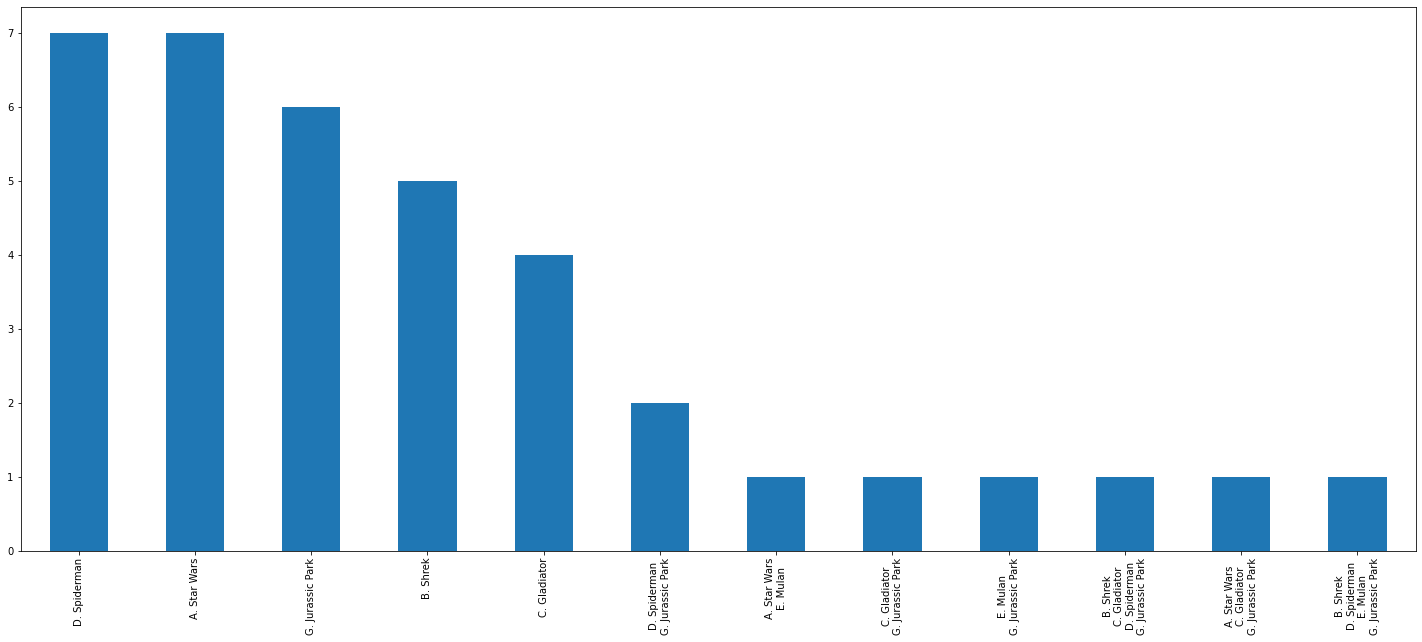

In [33]:
plt.figure(figsize=(25, 10))
data["Which of the following movies you'd say is your preferred?"].value_counts().plot(kind='bar')

From the above code we can see that the most preferred movie for students in "SPIDERMAN". Even the ones who have mentioned multiple movies too have "SPIDERMAN" as their preference

2.7) Lets check the heatmap of the Average movie watched in a week and the other 4 preferences

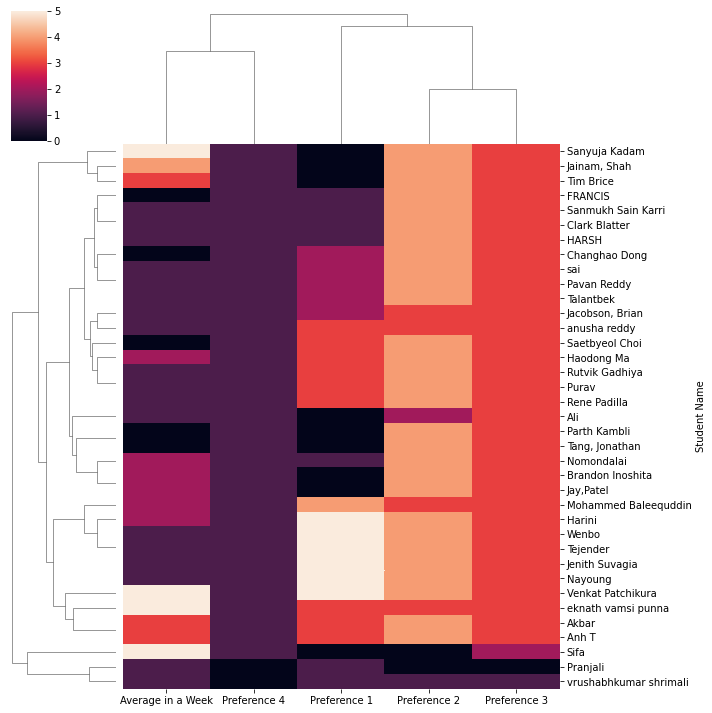

In [34]:
sns.clustermap(final[['Average in a Week', 'Preference 1', 'Preference 2','Preference 3','Preference 4']])
plt.show()

We can see that preference 4 and watching the movie in a week is highly co-related

3) Dendogram

Lets import the Dendogram library and other classes that will be needed for our clustering.

In [35]:
from scipy.cluster.hierarchy import dendrogram, linkage, leaves_list

Below is the list of students form our cohort

In [36]:
final.index

Index(['Akbar', 'Ali', 'Anh T', 'Brandon Inoshita', 'Changhao Dong',
       'Clark Blatter', 'FRANCIS', 'HARSH', 'Haodong Ma', 'Harini',
       'Jacobson, Brian', 'Jainam, Shah', 'Jay,Patel', 'Jenith Suvagia',
       'Mohammed Baleequddin', 'Nayoung', 'Nomondalai', 'Parth Kambli',
       'Pavan Reddy', 'Pranjali', 'Purav', 'Rene Padilla', 'Rutvik Gadhiya',
       'Saetbyeol Choi', 'Sanmukh Sain Karri', 'Sanyuja Kadam', 'Sifa',
       'Talantbek', 'Tang, Jonathan', 'Tejender', 'Tim Brice',
       'Venkat Patchikura', 'Wenbo', 'anusha reddy', 'eknath vamsi punna',
       'sai', 'vrushabhkumar shrimali'],
      dtype='object', name='Student Name')

Lets compute our Dendogram first for the whole dataset and set the line at 7.5 to see how many clusters do we find

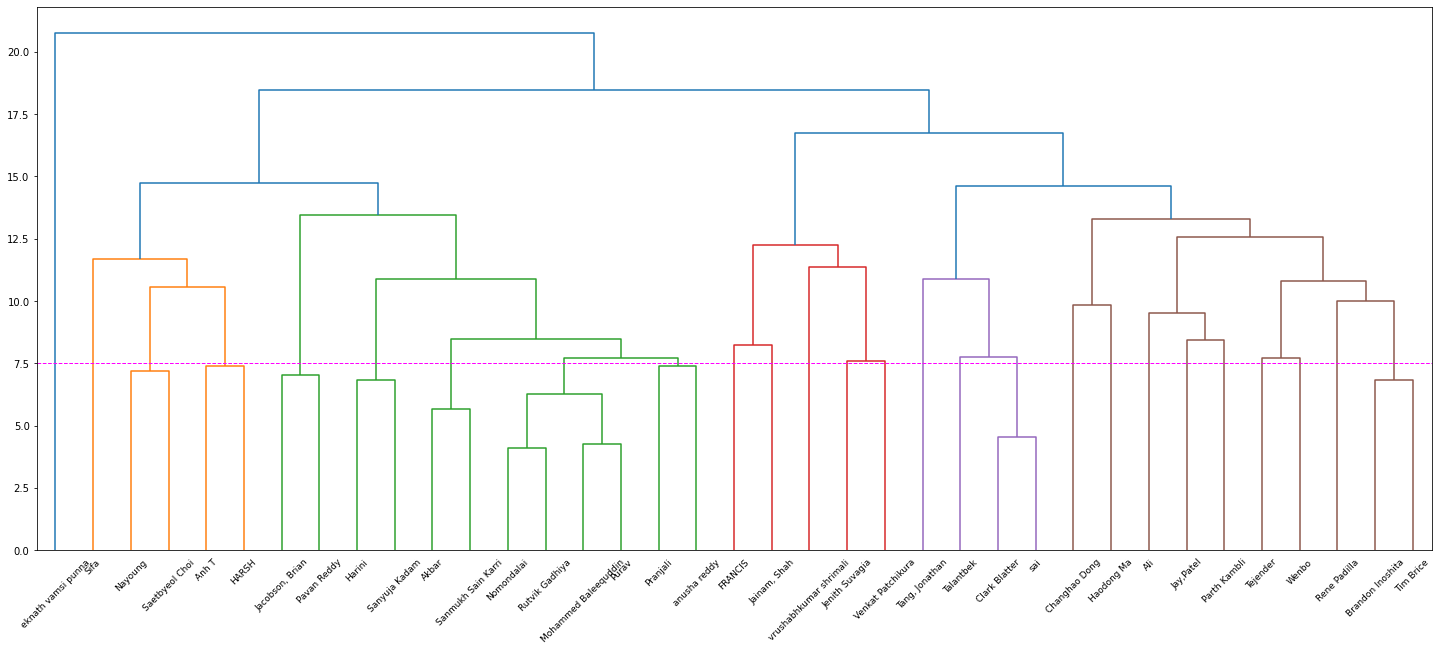

In [37]:
Z = linkage(final, 'complete')
plt.figure(figsize=(25, 10))
D = dendrogram(Z=Z, orientation="top", leaf_font_size=9, labels = final.index)
plt.axhline(y=7.5, c='magenta', lw=1, linestyle='dashed')

With 7.5 as the line we can see that there are almost 11 clusters formed for our voting that we had done for the dataset.Let's define and print these clusters and see where the students lie

In [279]:
from scipy.cluster.hierarchy import fcluster
k1=12
dend_clusters1 = fcluster(Z, k, criterion='maxclust')
dend_clusters1

array([ 4, 10,  1, 11,  9,  8,  5,  1,  9,  4,  3,  5, 10,  6,  4,  1,  4,
       10,  3,  4,  4, 11,  4,  1,  4,  4,  2,  8,  8, 11, 11,  6, 11,  4,
       12,  8,  7], dtype=int32)

In [280]:
for i in range(1, k1):
    print("\nCluster", i)
    display(final[["Action","Romance","Adventure","Average in a Week", "Preference 1"]][dend_clusters1 == i].index)


Cluster 1


Index(['Anh T', 'HARSH', 'Nayoung', 'Saetbyeol Choi'], dtype='object', name='Student Name')


Cluster 2


Index(['Sifa'], dtype='object', name='Student Name')


Cluster 3


Index(['Jacobson, Brian', 'Pavan Reddy'], dtype='object', name='Student Name')


Cluster 4


Index(['Akbar', 'Harini', 'Mohammed Baleequddin', 'Nomondalai', 'Pranjali',
       'Purav', 'Rutvik Gadhiya', 'Sanmukh Sain Karri', 'Sanyuja Kadam',
       'anusha reddy'],
      dtype='object', name='Student Name')


Cluster 5


Index(['FRANCIS', 'Jainam, Shah'], dtype='object', name='Student Name')


Cluster 6


Index(['Jenith Suvagia', 'Venkat Patchikura'], dtype='object', name='Student Name')


Cluster 7


Index(['vrushabhkumar shrimali'], dtype='object', name='Student Name')


Cluster 8


Index(['Clark Blatter', 'Talantbek', 'Tang, Jonathan', 'sai'], dtype='object', name='Student Name')


Cluster 9


Index(['Changhao Dong', 'Haodong Ma'], dtype='object', name='Student Name')


Cluster 10


Index(['Ali', 'Jay,Patel', 'Parth Kambli'], dtype='object', name='Student Name')


Cluster 11


Index(['Brandon Inoshita', 'Rene Padilla', 'Tejender', 'Tim Brice', 'Wenbo'], dtype='object', name='Student Name')

In [107]:
corr = final.corr()

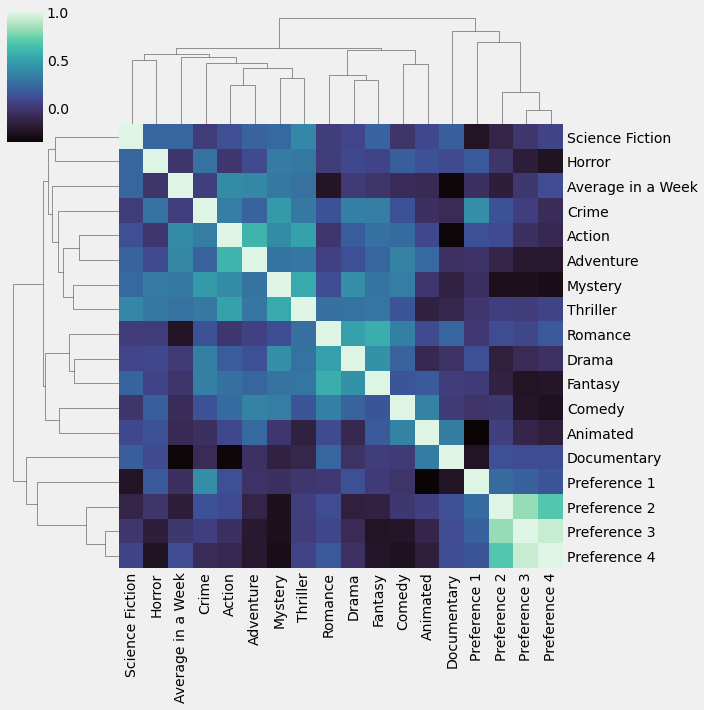

In [109]:
sns.clustermap(corr, cmap="mako")

From the above co-relation heatmap we can see that there is a high co-relationship between Action vs Adventure, romance vs fantasy so0 lets use some of these columns to create our another Dendogram for clustering

Lets create a Dendogram with "Action","Romance","Adventure","Average in a Week", "Preference 1" these columns from our dataset and keep the defining line at 5

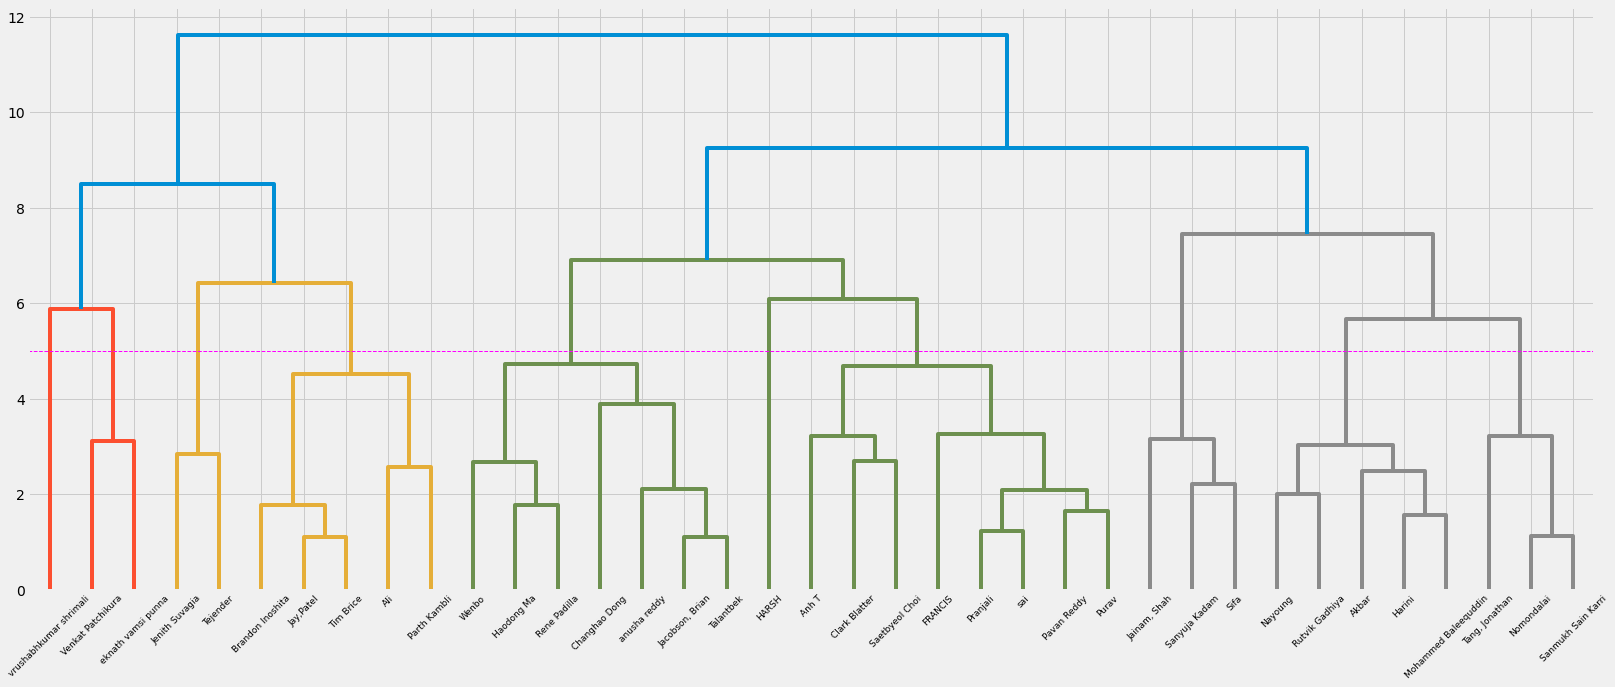

In [111]:
Z1 = linkage(final[["Action","Romance","Adventure","Average in a Week", "Preference 1"]], 'complete')
plt.figure(figsize=(25, 10))
D1 = dendrogram(Z=Z1, orientation="top", leaf_font_size=9, labels = final.index)
plt.axhline(y=5, c='magenta', lw=1, linestyle='dashed')

From the above graph we can see that for our line=5 we have 9 clusters formed. Let's define and print these clusters and see where the students lie

In [117]:
from scipy.cluster.hierarchy import fcluster
k=10
dend_clusters = fcluster(Z1, k, criterion='maxclust')
dend_clusters

array([ 9,  4,  6,  4,  5,  6,  6,  7,  5,  9,  5,  8,  4,  3,  9,  9, 10,
        4,  6,  6,  6,  5,  9,  6, 10,  8,  8,  5, 10,  3,  4,  1,  5,  5,
        1,  6,  2], dtype=int32)

In [119]:
for i in range(1, k):
    print("\nCluster", i)
    display(final[["Action","Romance","Adventure","Average in a Week", "Preference 1"]][dend_clusters == i].index)


Cluster 1


Index(['Venkat Patchikura', 'eknath vamsi punna'], dtype='object', name='Student Name')


Cluster 2


Index(['vrushabhkumar shrimali'], dtype='object', name='Student Name')


Cluster 3


Index(['Jenith Suvagia', 'Tejender'], dtype='object', name='Student Name')


Cluster 4


Index(['Ali', 'Brandon Inoshita', 'Jay,Patel', 'Parth Kambli', 'Tim Brice'], dtype='object', name='Student Name')


Cluster 5


Index(['Changhao Dong', 'Haodong Ma', 'Jacobson, Brian', 'Rene Padilla',
       'Talantbek', 'Wenbo', 'anusha reddy'],
      dtype='object', name='Student Name')


Cluster 6


Index(['Anh T', 'Clark Blatter', 'FRANCIS', 'Pavan Reddy', 'Pranjali', 'Purav',
       'Saetbyeol Choi', 'sai'],
      dtype='object', name='Student Name')


Cluster 7


Index(['HARSH'], dtype='object', name='Student Name')


Cluster 8


Index(['Jainam, Shah', 'Sanyuja Kadam', 'Sifa'], dtype='object', name='Student Name')


Cluster 9


Index(['Akbar', 'Harini', 'Mohammed Baleequddin', 'Nayoung', 'Rutvik Gadhiya'], dtype='object', name='Student Name')

So above are the 9 clusters and we can see that according to how the students have voted for "Action","Romance","Adventure","Average in a Week", "Preference 1" they have been clubbed

Lets print the complete data for these clusters as well

In [121]:
for i in range(1, k):
    print("\nCluster", i)
    display(final[dend_clusters == i])


Cluster 1


,Action,Adventure,Comedy,Crime,Drama,Fantasy,Science Fiction,Horror,Mystery,Romance,Thriller,Documentary,Animated,Average in a Week,Preference 1,Preference 2,Preference 3,Preference 4
Student Name,,,,,,,,,,,,,,,,,,
Venkat Patchikura,9.9,8.9,7.8,8.6,8.7,1.1,6.66,9.99,8.88,2.22,6.56,5.5,6.6,5,5,4,3,1
eknath vamsi punna,10.0,10.0,7.0,10.0,1.0,1.0,10.00,5.00,10.00,0.10,10.00,0.1,0.2,5,3,3,3,1



Cluster 2


,Action,Adventure,Comedy,Crime,Drama,Fantasy,Science Fiction,Horror,Mystery,Romance,Thriller,Documentary,Animated,Average in a Week,Preference 1,Preference 2,Preference 3,Preference 4
Student Name,,,,,,,,,,,,,,,,,,
vrushabhkumar shrimali,10.0,10.0,10.0,9.0,6.0,8.0,6.0,9.0,10.0,1.0,6.0,3.0,10.0,1,1,1,1,0



Cluster 3


,Action,Adventure,Comedy,Crime,Drama,Fantasy,Science Fiction,Horror,Mystery,Romance,Thriller,Documentary,Animated,Average in a Week,Preference 1,Preference 2,Preference 3,Preference 4
Student Name,,,,,,,,,,,,,,,,,,
Jenith Suvagia,9.9,6.9,8.6,8.5,8.4,5.5,8.3,9.9,8.3,4.3,8.5,3.2,7.6,1,5,4,3,1
Tejender,8.5,9.0,6.5,9.0,1.5,6.0,9.5,5.0,8.0,3.0,7.0,6.5,6.5,1,5,4,3,1



Cluster 4


,Action,Adventure,Comedy,Crime,Drama,Fantasy,Science Fiction,Horror,Mystery,Romance,Thriller,Documentary,Animated,Average in a Week,Preference 1,Preference 2,Preference 3,Preference 4
Student Name,,,,,,,,,,,,,,,,,,
Ali,6.0,6.0,6.0,5.0,7.0,3.0,10.0,3.0,7.0,4.0,5.0,9.0,7.0,1,0,2,3,1
Brandon Inoshita,8.9,9.1,5.6,6.1,1.2,9.3,9.0,6.2,6.3,5.2,8.3,7.2,9.7,2,0,4,3,1
"Jay,Patel",7.8,7.9,9.8,3.4,5.6,3.4,9.8,5.4,7.8,4.5,9.8,5.6,6.7,2,0,4,3,1
Parth Kambli,7.7,7.4,6.9,3.7,2.1,1.1,8.9,6.9,5.4,3.1,9.6,10.0,10.0,0,0,4,3,1
Tim Brice,7.8,8.4,6.4,5.4,4.9,8.5,9.2,3.5,6.1,4.5,5.7,3.9,7.9,3,0,4,3,1



Cluster 5


,Action,Adventure,Comedy,Crime,Drama,Fantasy,Science Fiction,Horror,Mystery,Romance,Thriller,Documentary,Animated,Average in a Week,Preference 1,Preference 2,Preference 3,Preference 4
Student Name,,,,,,,,,,,,,,,,,,
Changhao Dong,4.0,5.4,8.3,6.5,2.3,1.3,6.8,7.6,4.5,6.4,3.4,7.50,5.5,0,2,4,3,1
Haodong Ma,7.0,6.0,9.0,3.0,1.0,4.0,6.0,8.0,7.0,6.0,8.0,2.00,4.0,2,3,4,3,1
"Jacobson, Brian",5.9,6.9,4.2,9.3,9.5,8.1,9.0,7.5,8.1,8.1,8.5,10.00,1.0,1,2,3,3,1
Rene Padilla,8.3,5.5,6.9,4.4,2.1,8.8,9.9,7.4,7.3,5.5,7.5,9.21,3.5,1,3,4,3,1
Talantbek,7.0,7.0,9.0,5.0,7.0,7.0,6.0,1.0,8.0,8.0,4.0,6.00,9.0,1,2,4,3,1
Wenbo,7.0,6.6,8.0,9.5,2.0,6.0,4.5,5.0,5.0,5.0,5.0,8.00,8.7,1,5,4,3,1
anusha reddy,5.5,6.0,8.5,9.9,9.0,10.0,8.5,10.0,9.5,8.5,9.1,5.10,7.5,1,3,3,3,1



Cluster 6


,Action,Adventure,Comedy,Crime,Drama,Fantasy,Science Fiction,Horror,Mystery,Romance,Thriller,Documentary,Animated,Average in a Week,Preference 1,Preference 2,Preference 3,Preference 4
Student Name,,,,,,,,,,,,,,,,,,
Anh T,8.9,7.5,5.1,9.4,6.6,7.2,5.5,4.6,7.7,6.4,9.5,2.2,4.8,3,3,4,3,1
Clark Blatter,9.8,8.2,8.5,9.0,6.5,6.9,7.2,4.2,7.4,6.9,7.3,6.5,9.5,1,1,4,3,1
FRANCIS,6.0,8.0,10.0,8.0,5.0,4.0,10.0,10.0,8.0,7.0,6.0,9.0,10.0,0,1,4,3,1
Pavan Reddy,7.0,8.0,9.0,8.5,9.5,5.7,6.5,8.5,9.0,7.5,9.5,9.0,3.5,1,2,4,3,1
Pranjali,8.0,9.0,10.0,7.5,7.0,10.0,9.5,10.0,9.5,8.5,9.0,7.0,7.5,1,1,0,0,0
Purav,8.0,8.5,9.8,8.9,7.8,7.1,8.4,9.9,9.7,8.2,9.8,6.6,7.6,1,3,4,3,1
Saetbyeol Choi,9.2,8.2,9.5,9.8,7.5,6.5,6.2,2.5,7.8,5.5,8.8,5.2,1.5,0,3,4,3,1
sai,8.5,9.0,10.0,10.0,6.0,8.9,9.0,2.0,7.8,8.0,7.5,6.0,10.0,1,2,4,3,1



Cluster 7


,Action,Adventure,Comedy,Crime,Drama,Fantasy,Science Fiction,Horror,Mystery,Romance,Thriller,Documentary,Animated,Average in a Week,Preference 1,Preference 2,Preference 3,Preference 4
Student Name,,,,,,,,,,,,,,,,,,
HARSH,10.0,4.0,8.0,10.0,8.0,7.0,8.0,3.0,10.0,9.0,10.0,3.0,4.0,1,1,4,3,1



Cluster 8


,Action,Adventure,Comedy,Crime,Drama,Fantasy,Science Fiction,Horror,Mystery,Romance,Thriller,Documentary,Animated,Average in a Week,Preference 1,Preference 2,Preference 3,Preference 4
Student Name,,,,,,,,,,,,,,,,,,
"Jainam, Shah",10.0,10.0,10.0,8.9,2.2,5.9,10.0,9.8,9.5,5.0,9.5,9.2,9.9,4,0,4,3,1
Sanyuja Kadam,10.0,9.8,10.0,8.7,8.5,9.5,9.5,4.3,9.8,7.5,9.8,8.6,10.0,5,0,4,3,1
Sifa,8.0,9.0,8.0,3.0,8.0,7.0,9.0,1.0,8.0,7.0,8.0,4.0,6.0,5,0,0,2,1



Cluster 9


,Action,Adventure,Comedy,Crime,Drama,Fantasy,Science Fiction,Horror,Mystery,Romance,Thriller,Documentary,Animated,Average in a Week,Preference 1,Preference 2,Preference 3,Preference 4
Student Name,,,,,,,,,,,,,,,,,,
Akbar,9.90,9.90,9.8,8.5,5.40,7.9,8.9,9.9,6.9,10.0,9.5,3.8,7.4,3,3,4,3,1
Harini,9.50,8.90,9.8,10.1,7.90,9.7,9.9,5.4,8.6,10.0,9.6,8.7,9.6,2,5,4,3,1
Mohammed Baleequddin,9.00,10.00,9.0,9.0,8.00,8.0,8.0,10.0,10.0,10.0,10.0,7.0,5.0,2,4,3,3,1
Nayoung,9.99,9.99,9.0,6.5,9.99,7.4,7.6,1.1,5.5,8.9,7.1,4.1,1.1,1,5,4,3,1
Rutvik Gadhiya,10.00,9.80,8.9,9.3,9.90,9.6,10.0,9.5,7.8,8.7,9.9,6.8,9.3,1,3,4,3,1


4) Step-by-step K-means

In [83]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs

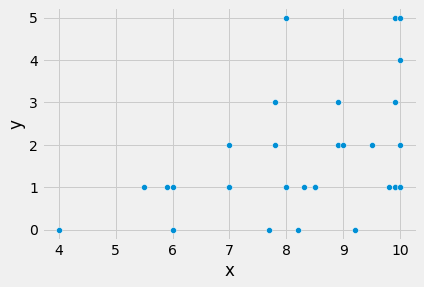

In [95]:
X_train = final
sns.scatterplot(x=final["Action"],
                y=final["Average in a Week"],
                palette="deep",
                legend=None
                )
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [80]:
def Kmeans(df1,k_cluster):
  print("Clusters are :")
  return()

In [ ]:
for i in range(k):
    print("\nCluster", i)
    print(final[kmeans.labels_ == i].index)

In [262]:
Kmeans(final,9)

Clusters are :


()

5) sklearn.cluster

Lets import the Kmeans library from sklearn.cluster

In [40]:
from sklearn.cluster import KMeans

So for our model we had 9 clusters formed now lets cluster them using Kmeans for our columns "Action","Romance","Adventure","Average in a Week", "Preference 1"

In [125]:
k = 9
model = KMeans(n_clusters = k)
model.fit(final[["Action","Romance","Adventure","Average in a Week", "Preference 1"]])
model.labels_

array([1, 0, 6, 0, 2, 7, 2, 8, 6, 1, 2, 4, 0, 3, 1, 1, 1, 0, 2, 7, 7, 6,
       1, 3, 1, 4, 4, 2, 7, 3, 0, 5, 6, 2, 5, 7, 5], dtype=int32)

Lets plot a 3-D space of Action Romance and Adventure

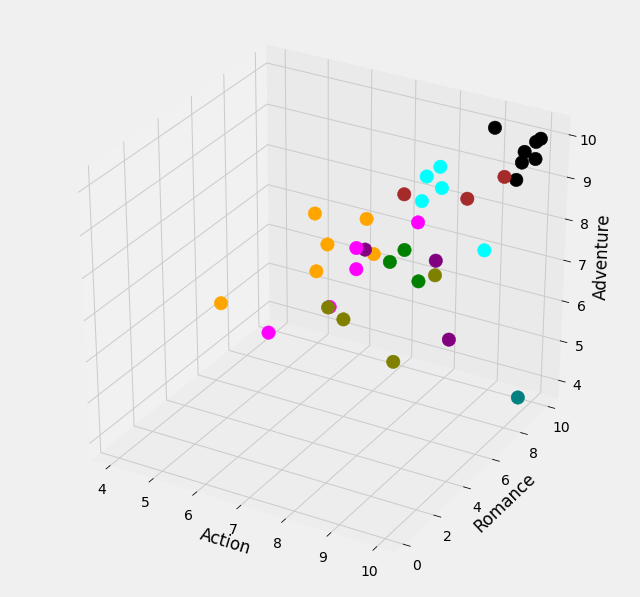

In [130]:
from mpl_toolkits.mplot3d import Axes3D
colormap = np.array(['magenta','black','orange','purple','brown','green','olive', 'cyan', 'teal'])

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs = final.Action, ys = final.Romance, zs = final.Adventure, 
           s= 180, depthshade = False, c = colormap[model.labels_])
    
ax.set_xlabel('Action')
ax.set_ylabel('Romance')
ax.set_zlabel('Adventure')

plt.show()

In [146]:
kmeans = KMeans(n_clusters=9).fit(final[["Action","Romance","Adventure","Average in a Week", "Preference 1"]])
centroids = kmeans.cluster_centers_
print(centroids)

[[ 7.64000000e+00  4.26000000e+00  7.76000000e+00  1.60000000e+00
  -4.44089210e-16]
 [ 7.80000000e+00  5.72500000e+00  6.40000000e+00  1.75000000e+00
   3.50000000e+00]
 [ 9.67800000e+00  9.52000000e+00  9.71800000e+00  1.80000000e+00
   4.00000000e+00]
 [ 9.20000000e+00  4.26666667e+00  8.03333333e+00  6.66666667e-01
   4.33333333e+00]
 [ 9.96666667e+00  1.10666667e+00  9.63333333e+00  3.66666667e+00
   3.00000000e+00]
 [ 8.91428571e+00  8.62857143e+00  9.05714286e+00  1.00000000e+00
   1.28571429e+00]
 [ 9.33333333e+00  6.50000000e+00  9.60000000e+00  4.66666667e+00
   0.00000000e+00]
 [ 5.90000000e+00  7.58333333e+00  6.88333333e+00  6.66666667e-01
   2.00000000e+00]
 [ 1.00000000e+01  9.00000000e+00  4.00000000e+00  1.00000000e+00
   1.00000000e+00]]


In [147]:
kmeans.labels_

array([2, 0, 1, 0, 7, 5, 7, 8, 1, 2, 7, 6, 0, 3, 2, 2, 5, 0, 7, 5, 5, 1,
       2, 3, 5, 6, 6, 7, 5, 3, 0, 4, 1, 7, 4, 5, 4], dtype=int32)

The above code basically tells us the different types of clusters formed.
Lets plot these clusters and their centroids below.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


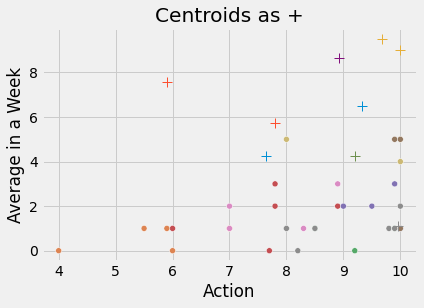

In [272]:
sns.scatterplot(final["Action"],
                final["Average in a Week"],
                hue=kmeans.labels_.astype(float),
                palette="deep",
                legend=None
                )
plt.plot([centroids[:,0]],
         [centroids[:,1]],
         '+',
         markersize=10,
         )
plt.title("Centroids as +")
plt.show()

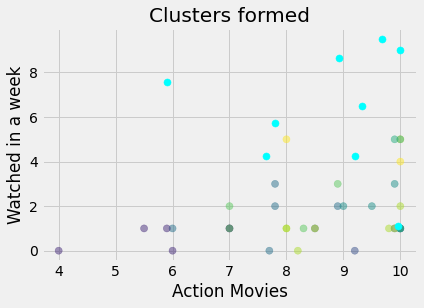

In [271]:
plt.scatter(final["Action"], final["Average in a Week"], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], s=50, c='cyan')
plt.xlabel("Action Movies") 
plt.ylabel("Watched in a week") 
plt.title("Clusters formed")
plt.show()

In [261]:
k=9
for i in range(k):
    print("\nCluster", i)
    print(final[kmeans.labels_ == i].index)


Cluster 0
Index(['HARSH'], dtype='object', name='Student Name')

Cluster 1
Index(['Changhao Dong', 'FRANCIS', 'Jacobson, Brian', 'Pavan Reddy',
       'Talantbek', 'anusha reddy'],
      dtype='object', name='Student Name')

Cluster 2
Index(['Jenith Suvagia', 'Saetbyeol Choi', 'Tejender'], dtype='object', name='Student Name')

Cluster 3
Index(['Ali', 'Brandon Inoshita', 'Jay,Patel', 'Parth Kambli', 'Tim Brice'], dtype='object', name='Student Name')

Cluster 4
Index(['Akbar', 'Harini', 'Mohammed Baleequddin', 'Nayoung', 'Rutvik Gadhiya'], dtype='object', name='Student Name')

Cluster 5
Index(['Venkat Patchikura', 'eknath vamsi punna', 'vrushabhkumar shrimali'], dtype='object', name='Student Name')

Cluster 6
Index(['Anh T', 'Haodong Ma', 'Rene Padilla', 'Wenbo'], dtype='object', name='Student Name')

Cluster 7
Index(['Clark Blatter', 'Nomondalai', 'Pranjali', 'Purav',
       'Sanmukh Sain Karri', 'Tang, Jonathan', 'sai'],
      dtype='object', name='Student Name')

Cluster 8
Index(['Ja

6)Prediction

Let's create a prediction function to see where a new student might belong to.

In [245]:
def Prediction(Action,Romance,Adventure,Average,Preference):
  Action = Action
  Romance = Romance
  Adventure = Adventure
  Average = Average
  Preference = Preference
  data_class = model.predict(np.array([Action,Romance, Adventure, Average,Preference]).reshape(1, -1))[0]
  print("Cluster the stuent belongs to is :", data_class, "please scan your voucher at the booth", data_class)

Lets run the above prediction function for different values of Action,Romance,Adventure,Average,Preference voted by a new student and check which cluster he belongs to

6.1)Run 1

In [246]:
Prediction(1,6,10,5,9)

Cluster the stuent belongs to is : 6 please scan your voucher at the booth 6


6.2)Run 2

In [247]:
Prediction(1,1,1,1,1)

Cluster the stuent belongs to is : 0 please scan your voucher at the booth 0


6.3) Run 3

In [248]:
Prediction(10,10,10,10,10)

Cluster the stuent belongs to is : 1 please scan your voucher at the booth 1


6.4) Run 4

In [249]:
Prediction(1.1,5.6,7.8,9.0,10)

Cluster the stuent belongs to is : 6 please scan your voucher at the booth 6


6.5) Run 5

In [250]:
Prediction(8,5,3,1,2.3)

Cluster the stuent belongs to is : 6 please scan your voucher at the booth 6


6.6) Run 6

In [251]:
Prediction(2,3,2,3,1)

Cluster the stuent belongs to is : 2 please scan your voucher at the booth 2


6.7) Run 7

In [252]:
Prediction(9,8,9,8,5)

Cluster the stuent belongs to is : 4 please scan your voucher at the booth 4


6.8) Run 8

In [253]:
Prediction(6,1,10,8,5)

Cluster the stuent belongs to is : 5 please scan your voucher at the booth 5


In [254]:
Prediction(4,4,1,5,5)

Cluster the stuent belongs to is : 6 please scan your voucher at the booth 6


6.9) Run 9

In [256]:
Prediction(0,8,5,2,1)

Cluster the stuent belongs to is : 2 please scan your voucher at the booth 2


6.10) Run 10

In [257]:
Prediction(8,9,3,2,1)

Cluster the stuent belongs to is : 8 please scan your voucher at the booth 8


if we check for what cluster and student the above predictions will belong too we can check from the below code. Like for Run 10 the student will belng to cluster 8 and will have Harsh to discuss familiarities

In [258]:
for i in range(k):
    print("\nCluster", i)
    print(final[model.labels_ == i].index)


Cluster 0
Index(['Ali', 'Brandon Inoshita', 'Jay,Patel', 'Parth Kambli', 'Tim Brice'], dtype='object', name='Student Name')

Cluster 1
Index(['Akbar', 'Harini', 'Mohammed Baleequddin', 'Nayoung', 'Nomondalai',
       'Rutvik Gadhiya', 'Sanmukh Sain Karri'],
      dtype='object', name='Student Name')

Cluster 2
Index(['Changhao Dong', 'FRANCIS', 'Jacobson, Brian', 'Pavan Reddy',
       'Talantbek', 'anusha reddy'],
      dtype='object', name='Student Name')

Cluster 3
Index(['Jenith Suvagia', 'Saetbyeol Choi', 'Tejender'], dtype='object', name='Student Name')

Cluster 4
Index(['Jainam, Shah', 'Sanyuja Kadam', 'Sifa'], dtype='object', name='Student Name')

Cluster 5
Index(['Venkat Patchikura', 'eknath vamsi punna', 'vrushabhkumar shrimali'], dtype='object', name='Student Name')

Cluster 6
Index(['Anh T', 'Haodong Ma', 'Rene Padilla', 'Wenbo'], dtype='object', name='Student Name')

Cluster 7
Index(['Clark Blatter', 'Pranjali', 'Purav', 'Tang, Jonathan', 'sai'], dtype='object', name='Stud

7)Summary and Recommendations

MovieBuff was able to cluster and club students into their different clusters based on our dataset. Something that is peculoiar about the analysis is that since "Spiderman" was the most preferred movie the scores for "Action" and "Adventure" are also higher for those students.

Any new student who joins the cohort won't be alone as there are many clusters and students that have lots of similarities based on the voting they have done